# Carga y visualización de señales de audio

Visualizing sound means to visualize air waves.

We can take samples of the air pressure over time commonly 44.1kHz. 

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [20]:
filename = './example_data/101_1b1_Pr_sc_Meditron.wav'
#y, sr = librosa.load(filename, sr = None) #None loads the sampling rate from the wav file
y, sr = librosa.load(filename) #signal and sampling rate

In [21]:
#librosa.load?

In [22]:
print(type(y))
print(type(sr))

<class 'numpy.ndarray'>
<class 'int'>


In [23]:
print(y.shape)
print(sr)

(441000,)
22050


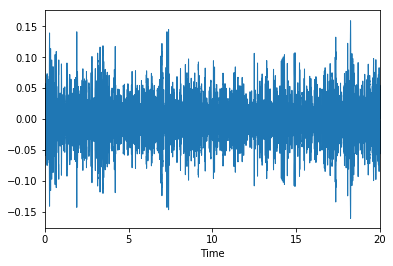

In [24]:
librosa.display.waveplot(y, sr=sr);

## Time-Frequency Analysis

STFT

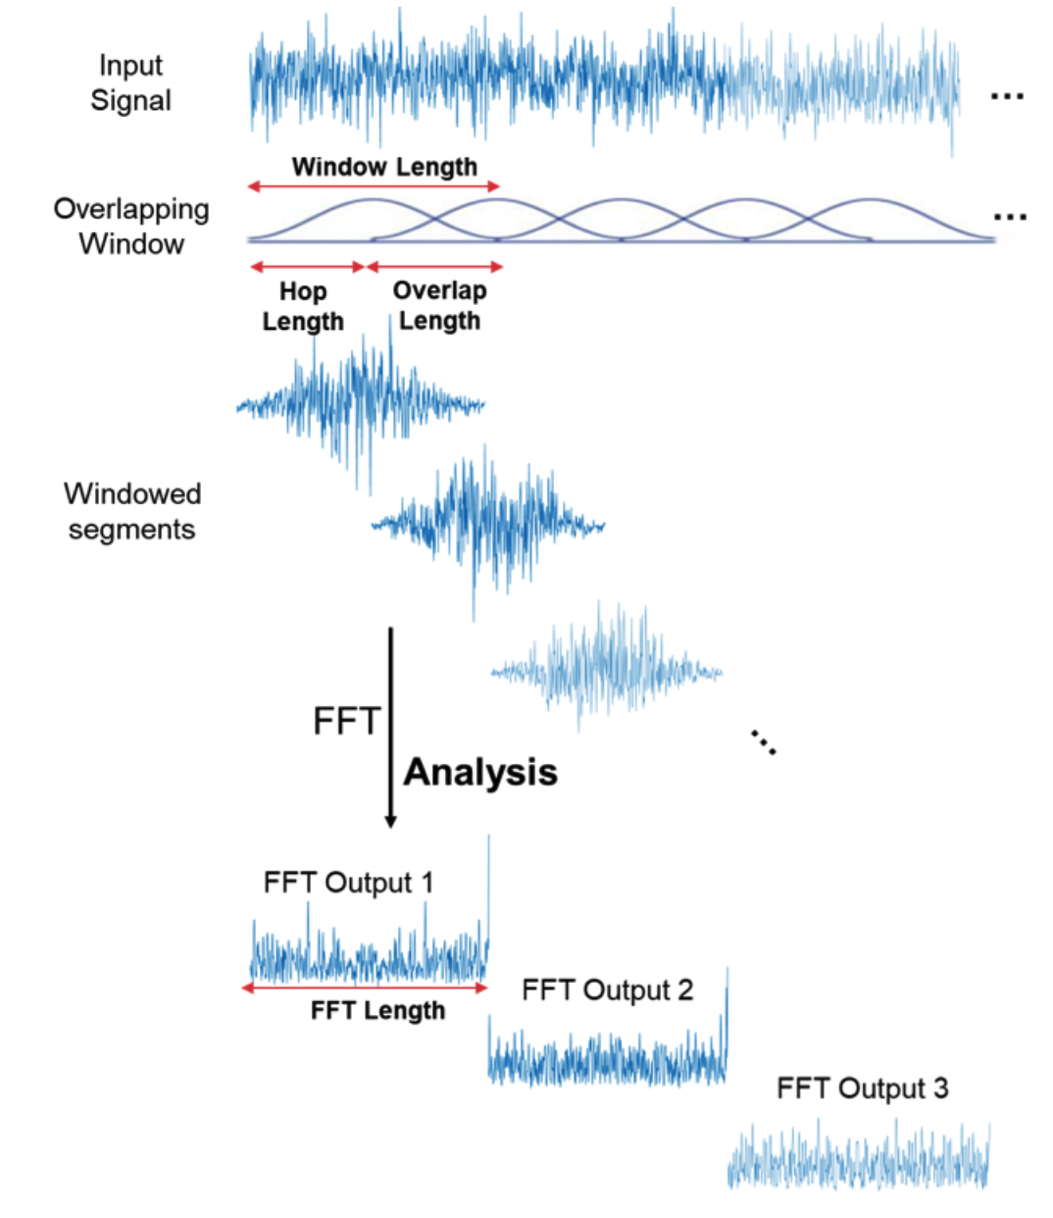

In [25]:
hop_length = 512
n_fft = 2048
D = np.abs(librosa.stft(y, n_fft=n_fft,hop_length=hop_length))

In [26]:
print(type(D))
print(D.shape)

<class 'numpy.ndarray'>
(1025, 862)


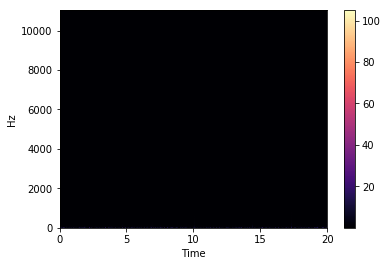

In [27]:
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear');
plt.colorbar();

We can't see nothing because most sounds humans hear are concentrated in very small frequency and amplitude ranges.

Let’s make a small adjustment:

Transform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.

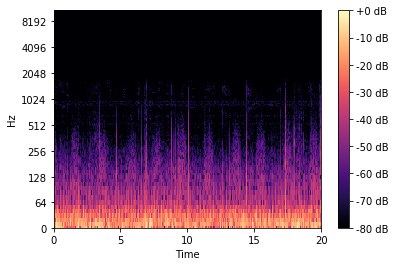

In [28]:
DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');

## The Mel Scale

The Mel Scale is the result of a non-linear transformation of the frequency scale.

This Mel Scale is constructed such that sounds of equal distance from each other on the Mel Scale, also “sound” to humans as they are equal in distance from one another.

Studies have shown that humans do not perceive frequencies on a linear scale. We are better at detecting differences in lower frequencies than higher frequencies.

For humans the difference between 500 and 1000 Hz is obvious but the difference between 7500 and 8000 Hz is barely noticeable.

In [29]:
n_mels = 128
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)
mel_10 = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=10)

It partitions the Hz scale into bins, and transforms each bin into a corresponding bin in the Mel Scale, using a overlapping triangular filters.

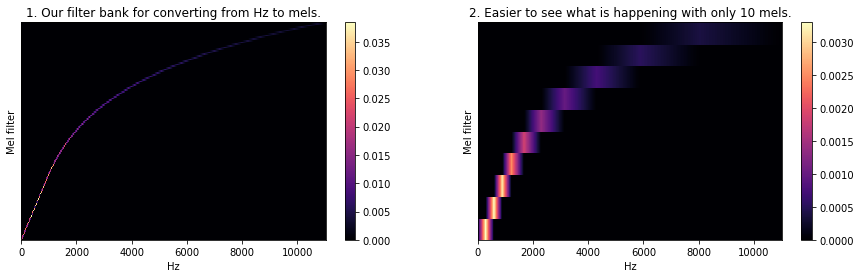

In [30]:
plt.figure(figsize=(15, 4));
plt.subplot(1, 2, 1);
librosa.display.specshow(mel, sr=sr, hop_length=hop_length, x_axis='linear');
plt.ylabel('Mel filter');
plt.colorbar();
plt.title('1. Our filter bank for converting from Hz to mels.');

plt.subplot(1, 2, 2);
librosa.display.specshow(mel_10, sr=sr, hop_length=hop_length, x_axis='linear');
plt.ylabel('Mel filter');
plt.colorbar();
plt.title('2. Easier to see what is happening with only 10 mels.');

Now we can take the amplitude of one time window, compute the dot product with mel to perform the transformation, and get a visualization of the sound in this new frequency scale.

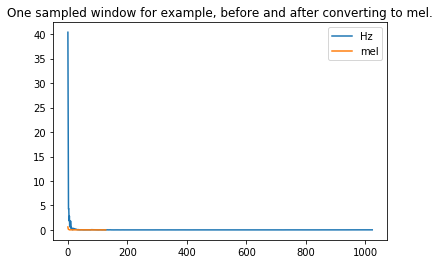

In [31]:
plt.plot(D[:, 1]);
plt.plot(mel.dot(D[:, 1]));
plt.legend(labels=['Hz', 'mel']);
plt.title('One sampled window for example, before and after converting to mel.');

the Mel Spectrogram is a Spectrogram with the Mel Scale as its y axis.

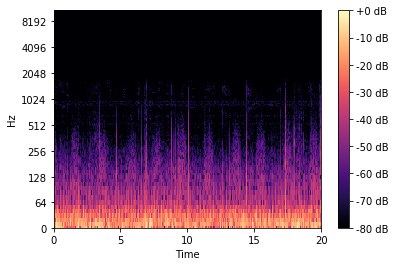

In [33]:
DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');

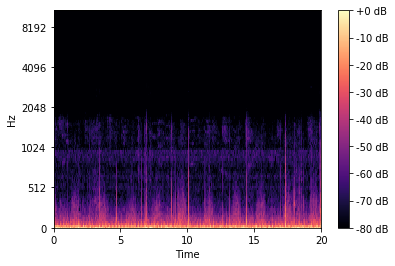

In [32]:
S = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');

# Filtrado lineal

In [35]:
from linearFIR import filter_design, mfreqz
import scipy.signal as signal

250.0
pop_eegfiltnew() - cutoff frequency(ies) (-6 dB): [1125.] Hz



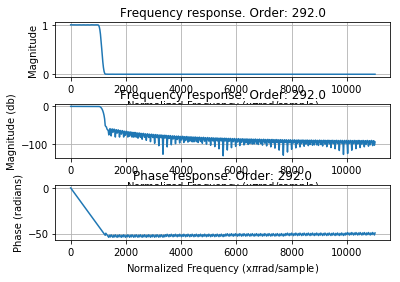

25.0
pop_eegfiltnew() - cutoff frequency(ies) (-6 dB): [87.5] Hz



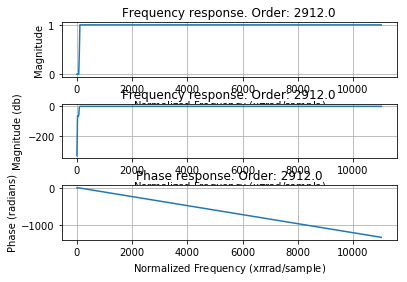

In [36]:
fs = sr;
#design
order, lowpass = filter_design(fs, locutoff = 0, hicutoff = 1000, revfilt = 0);
#plot
mfreqz(lowpass,1,order, fs/2);

order, highpass = filter_design(fs, locutoff = 100, hicutoff = 0, revfilt = 1);
#plot
mfreqz(highpass,1,order, fs/2);

In [37]:
y_hp = signal.filtfilt(highpass, 1, y);
y_bp = signal.filtfilt(lowpass, 1, y_hp);

In [38]:
y_bp = np.asfortranarray(y_bp)
print(y_bp.shape)

(441000,)


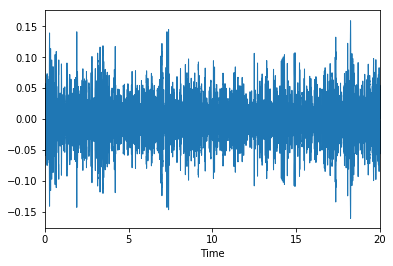

In [40]:
librosa.display.waveplot(y, sr=sr);

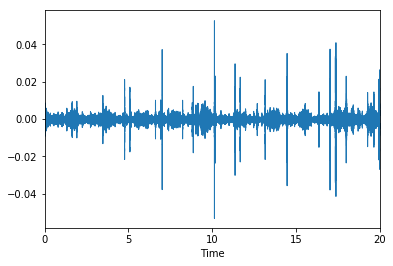

In [39]:
librosa.display.waveplot(y_bp, sr=sr);

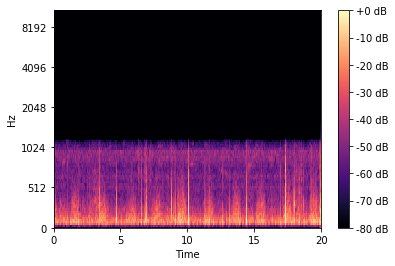

In [41]:
S = librosa.feature.melspectrogram(y_bp, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');

In [42]:
librosa.save?

Object `librosa.save` not found.


In [43]:
librosa.output.write_wav?

In [46]:
librosa.output.write_wav('result.wav',y_bp,sr)